# BiliDash

This is a notebook that prepares the data for bilidash

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import seaborn as sns
sns.set_style("white")
fig_w = 2530
fig_h = 1900
my_dpi=200



In [2]:
plt.style.use('ggplot')

from matplotlib import rcParams
# plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.rc('font', family='BabelStone Han', size=13) # 选择你自己电脑上的字体

In [3]:
# 如果还没有数据，来群里索要数据文件就行

df = pd.read_csv('data/full-data.csv') 

In [4]:
list(df.columns.values)

['Unnamed: 0',
 'aid',
 'uid',
 'time',
 'duration',
 'state',
 'view',
 'danmaku',
 'coin',
 'favorite',
 'share',
 'reply',
 'like',
 'sectid',
 'sectname']

In [5]:
df['time'] = pd.to_datetime(df['time'],unit='s')

In [8]:
df[df['view']<0].groupby('sectname').count().head(5)

,Unnamed: 0,aid,uid,time,duration,state,view,danmaku,coin,favorite,share,reply,like,sectid
sectname,,,,,,,,,,,,,,
ASMR,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285,2285
GMV,251,251,251,251,251,251,251,251,251,251,251,251,251,251
Korea相关,488,488,488,488,488,488,488,488,488,488,488,488,488,488
MAD-AMV,8562,8562,8562,8562,8562,8562,8562,8562,8562,8562,8562,8562,8562,8562
MMD-3D,17552,17552,17552,17552,17552,17552,17552,17552,17552,17552,17552,17552,17552,17552


In [7]:
df['time'].max()

Timestamp('2018-02-28 15:00:27')

## Data

### Duration

In [103]:
dur_hist_data_max = df['duration'].max()/60

In [104]:
# dur_hist_data = np.floor(df[df['duration']<3600+60]['duration'].values/60)
dur_hist_data = np.floor(df['duration'].values/60)

In [105]:
dur_hist_data_values, dur_hist_data_bins = np.histogram(dur_hist_data, bins=np.arange(61))

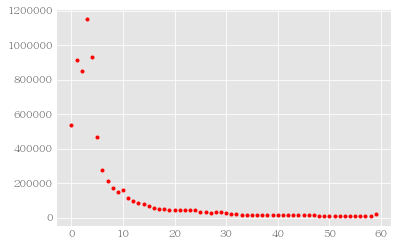

In [106]:
plt.plot( dur_hist_data_bins[:-1], dur_hist_data_values ,'r.')

In [107]:
dur_hist_data_csv =  np.vstack((dur_hist_data_bins[:-1], dur_hist_data_values)).T

In [108]:
dur_hist_data_csv[:5].astype(int)

array([[      0,  539336],
       [      1,  915739],
       [      2,  850891],
       [      3, 1153926],
       [      4,  930114]])

In [109]:
np.savetxt('bilidash/dur_hist_data.csv', dur_hist_data_csv, delimiter=',', header="bin,count", fmt='%i')

### Coins

In [110]:
coin_hist_data_max = df['coin'].max()
print(coin_hist_data_max)

1261542


In [111]:
coin_hist_data = np.floor(df['coin'].values)

In [130]:
coin_hist_data_values, coin_hist_data_bins = np.histogram(coin_hist_data, bins=np.arange(0,5000,1))

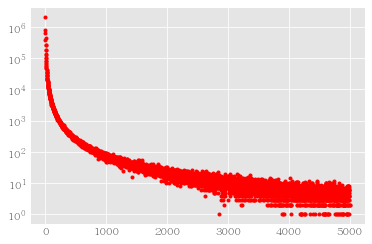

In [131]:
plt.semilogy( coin_hist_data_bins[:-1], coin_hist_data_values ,'r.')

In [132]:
coin_hist_data_csv =  np.vstack((coin_hist_data_bins[:-1], coin_hist_data_values)).T

In [133]:
np.savetxt('bilidash/coin_hist_data.csv', coin_hist_data_csv, delimiter=',', header="bin,count", fmt='%i')

### Views

29385006


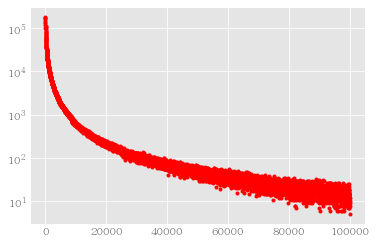

In [138]:
view_hist_data_max = df['view'].max()
print(view_hist_data_max)

view_hist_data = np.floor(df['view'].values)

view_hist_data_values, view_hist_data_bins = np.histogram(view_hist_data, bins=np.arange(0,100000,10))

plt.semilogy( view_hist_data_bins[:-1], view_hist_data_values ,'r.')

In [139]:
view_hist_data_csv =  np.vstack((view_hist_data_bins[:-1], view_hist_data_values)).T

np.savetxt('bilidash/view_hist_data.csv', view_hist_data_csv, delimiter=',', header="bin,count", fmt='%i')